# Prepare predictions for the 11th year

## Cleaning data on 11th year files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

coaches_11th = pd.read_csv('../data/Season_11/coaches.csv')
players_teams_11th = pd.read_csv('../data/Season_11/players_teams.csv')
teams_11th = pd.read_csv('../data/Season_11/teams.csv')

In [2]:
# coaches_11th = coaches_11th.drop(columns=['stint', 'lgID', 'year'])
# players_teams_11th = players_teams_11th.drop(columns=['stint', 'lgID', 'year'])
# teams_11th = teams_11th.drop(columns=['lgID', 'franchID', 'year', 'name', 'arena'])

# coaches_11th.to_csv('../data/Season_11/coaches.csv', index=False)
# players_teams_11th.to_csv('../data/Season_11/players_teams.csv', index=False)
# teams_11th.to_csv('../data/Season_11/teams.csv', index=False)

## Maping categorical values

In [3]:
# map_teams = {
#     'ATL': 0, 'CHI': 2, 'CON': 4, 'IND': 7, 
#     'LAS': 8, 'MIN': 10, 'NYL': 11, 'PHO': 13, 
#     'SAS': 16, 'SEA': 17, 'WAS': 19, 'TUL': 20
# }

# map_conf = {
#   'EA': 0, 'WE': 1
# }

# coaches_11th['tmID'] = coaches_11th['tmID'].map(map_teams)
# players_teams_11th['tmID'] = players_teams_11th['tmID'].map(map_teams)
# teams_11th['tmID'] = teams_11th['tmID'].map(map_teams)
# teams_11th['confID'] = teams_11th['confID'].map(map_conf)

# coaches_11th.to_csv('../data/Season_11/coaches.csv', index=False)
# players_teams_11th.to_csv('../data/Season_11/players_teams.csv', index=False)
# teams_11th.to_csv('../data/Season_11/teams.csv', index=False)

## Import data from the past 10 years

In [4]:
awards_players_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/awards_players_cleaned.csv')
coaches_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/coaches_cleaned.csv')
players_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/players_cleaned.csv')
players_teams_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/players_teams_cleaned.csv')
series_post_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/series_post_cleaned.csv')
teams_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/teams_cleaned.csv')
teams_post_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/teams_post_cleaned.csv')

In [5]:
awards_players_10_years = awards_players_cleaned[awards_players_cleaned['year'] != 11]
coaches__10_years = coaches_cleaned[coaches_cleaned['year'] != 11]
players_teams_10_years = players_teams_cleaned[players_teams_cleaned['year'] != 11]
series_post_10_years = series_post_cleaned[series_post_cleaned['year'] != 11]
teams_10_years = teams_cleaned[teams_cleaned['year'] != 11]
teams_post_10_years = teams_post_cleaned[teams_post_cleaned['year'] != 11]

for df, name in [(awards_players_10_years, 'awards'), 
                 (coaches__10_years, 'coaches'),
                 (players_teams_10_years, 'players'),
                 (series_post_10_years, 'series'),
                 (teams_10_years, 'teams'),
                 (teams_post_10_years, 'teams_post')]:
    if df['year'].max() != 10:
        print(f"Warning: {name} contains data beyond year 10")

awards_players_10_years.to_csv('../data/Season_11/awards_players_10_years.csv', index=False)
coaches__10_years.to_csv('../data/Season_11/coaches_10_years.csv', index=False)
players_cleaned.to_csv('../data/Season_11/players_10_years.csv', index=False)
players_teams_10_years.to_csv('../data/Season_11/players_teams_10_years.csv', index=False)
series_post_10_years.to_csv('../data/Season_11/series_post_10_years.csv', index=False)
teams_10_years.to_csv('../data/Season_11/teams_10_years.csv', index=False)
teams_post_10_years.to_csv('../data/Season_11/teams_post_10_years.csv', index=False)

## Overalls from 10 years

In [6]:
players_overall_avg = players_teams_10_years.groupby('playerID')['OVERALL'].mean().reset_index()

players_overall_avg.rename(columns={'OVERALL': 'OVERALL_ALL_TIME'}, inplace=True)

players_overall_avg['OVERALL_ALL_TIME'] = players_overall_avg['OVERALL_ALL_TIME'].round(1)

players_overall_avg.to_csv('../data/Season_11/players_overall_all_time_10_years.csv', index=False)

In [7]:
rookie_players = players_teams_10_years[players_teams_10_years['is_rookie'] == 1]

rookie_overall_avg = rookie_players['OVERALL'].mean().round(1)

rookie_overall_avg_df = pd.DataFrame({'rookie_overall_avg': [rookie_overall_avg]})

rookie_overall_avg_df.to_csv('../data/Season_11/rookie_overall_avg_10_years.csv', index=False)

In [8]:
rookie_coaches = coaches__10_years[coaches__10_years['is_rookie'] == 1]

rookie_overall_coaches_avg = rookie_coaches['OVERALL'].mean().round(1)

rookie_overall_coaches_avg_df = pd.DataFrame({'rookie_overall_coaches_avg': [rookie_overall_coaches_avg]})

rookie_overall_coaches_avg_df.to_csv('../data/Season_11/rookie_overall_coaches_avg_10_years.csv', index=False)

In [9]:
coaches_overall_avg = coaches__10_years.groupby('coachID')['OVERALL'].mean().reset_index()

coaches_overall_avg.rename(columns={'OVERALL': 'OVERALL_ALL_TIME'}, inplace=True)

coaches_overall_avg['OVERALL_ALL_TIME'] = coaches_overall_avg['OVERALL_ALL_TIME'].round(1)

coaches_overall_avg.to_csv('../data/Season_11/coaches_overall_all_time_10_years.csv', index=False)

# Add overalls calculated from 10 years to the 11th year players and coach

In [10]:
# players_teams = pd.read_csv('../data/Season_11/players_teams.csv')
# players_overall_all_time_10_years = pd.read_csv('../data/Season_11/players_overall_all_time_10_years.csv')

# rookie_avg = 5.6 

# players_teams = players_teams.merge(
#     players_overall_all_time_10_years[['playerID', 'OVERALL_ALL_TIME']],
#     on='playerID',
#     how='left'
# ).fillna({'OVERALL_ALL_TIME': rookie_avg})

# players_teams.rename(columns={'OVERALL_ALL_TIME': 'OVERALL'}, inplace=True)

# players_teams.to_csv('../data/Season_11/players_teams.csv', index=False)

In [11]:
# coaches = pd.read_csv('../data/Season_11/coaches.csv')
# coaches_overall_all_time_10_years = pd.read_csv('../data/Season_11/coaches_overall_all_time_10_years.csv')

# rookie_avg_coach = 9.0 

# coaches = coaches.merge(
#     coaches_overall_all_time_10_years[['coachID', 'OVERALL_ALL_TIME']],
#     on='coachID',
#     how='left'
# ).fillna({'OVERALL_ALL_TIME': rookie_avg_coach})

# coaches.rename(columns={'OVERALL_ALL_TIME': 'OVERALL'}, inplace=True)

# coaches.to_csv('../data/Season_11/coaches.csv', index=False)

## Given the teams players composition and their respective overalls calculate the team overall (mean of all players)

In [12]:
players = pd.read_csv('../data/Season_11/players_teams.csv')

team_overall = players.groupby('tmID')['OVERALL'].mean().reset_index()

team_overall['overall_team'] = team_overall['OVERALL'].round(1)

team_overall = team_overall.drop(columns=['OVERALL'])

team_overall.to_csv('../data/Season_11/team_overall.csv', index=False)

## Given the team coaches and their respective overalls calculate the coach overall (mean of all coaches(1 or more than 1))

In [13]:
coaches = pd.read_csv('../data/Season_11/coaches.csv')

team_overall_coaches = coaches.groupby('tmID')['OVERALL'].mean().reset_index()

team_overall_coaches['overall_team_coach'] = team_overall_coaches['OVERALL'].round(1)

team_overall_coaches = team_overall_coaches.drop(columns=['OVERALL'])

team_overall_coaches.to_csv('../data/Season_11/team_overall_coaches.csv', index=False)

## Models


Model Performance:
-----------------

SVM:
Training Accuracy: 81.15%
Training F1 Score: 0.85
Training Precision: 0.79
Training Recall: 0.92

Team Playoff Predictions for Year 11:
Team 0: Predicted = 1
Team 2: Predicted = 1
Team 4: Predicted = 1
Team 7: Predicted = 1
Team 8: Predicted = 1
Team 10: Predicted = 1
Team 11: Predicted = 0
Team 13: Predicted = 1
Team 16: Predicted = 1
Team 17: Predicted = 0
Team 20: Predicted = 0
Team 19: Predicted = 0

Decision Tree:
Training Accuracy: 91.80%
Training F1 Score: 0.93
Training Precision: 0.91
Training Recall: 0.96

Team Playoff Predictions for Year 11:
Team 0: Predicted = 1
Team 2: Predicted = 1
Team 4: Predicted = 1
Team 7: Predicted = 1
Team 8: Predicted = 1
Team 10: Predicted = 1
Team 11: Predicted = 0
Team 13: Predicted = 1
Team 16: Predicted = 1
Team 17: Predicted = 0
Team 20: Predicted = 0
Team 19: Predicted = 0

Random Forest:
Training Accuracy: 100.00%
Training F1 Score: 1.00
Training Precision: 1.00
Training Recall: 1.00

Team Playof

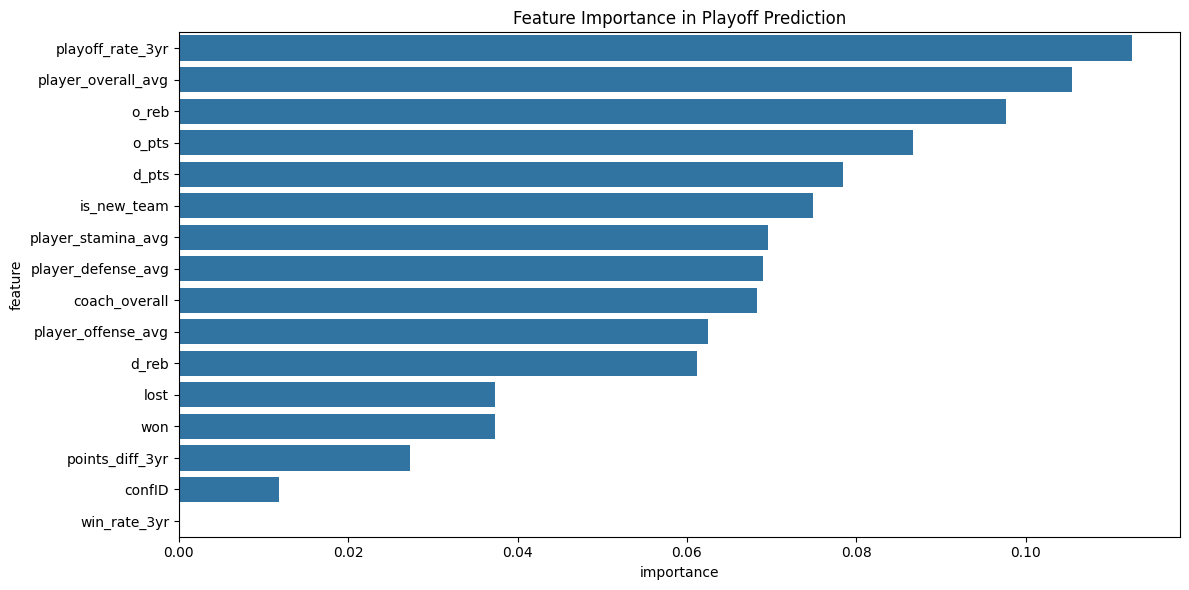

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Read data
teams_10_years = pd.read_csv('../data/Season_11/teams_10_years.csv')
players_teams_10_years = pd.read_csv('../data/Season_11/players_teams_10_years.csv')
coaches__10_years = pd.read_csv('../data/Season_11/coaches_10_years.csv')
teams_year_11 = pd.read_csv('../data/Season_11/teams.csv')
teams_year_11 = teams_year_11[['tmID', 'confID']]

# Feature creation function with NaN handling
def create_features_for_team(team_data, teams_history, players_teams_data, coaches_data, year):
    features = {
        'won': team_data['won'] if 'won' in team_data else 0, 
        'lost': team_data['lost'] if 'lost' in team_data else 0,
        'o_pts': team_data['o_pts'] if 'o_pts' in team_data else 0,
        'd_pts': team_data['d_pts'] if 'd_pts' in team_data else 0,
        'o_reb': team_data['o_reb'] if 'o_reb' in team_data else 0,
        'd_reb': team_data['d_reb'] if 'd_reb' in team_data else 0,
        'confID': team_data['confID'],
        'is_new_team': 0
    }
    
    # Calculate historical averages
    team_history_data = teams_history[
        (teams_history['tmID'] == team_data['tmID']) & 
        (teams_history['year'] <= year)
    ].sort_values('year')
    
    if team_history_data.empty: 
        features['win_rate_3yr'] = 0  # Neutral fallback
        features['playoff_rate_3yr'] = 0 
        features['points_diff_3yr'] = 0 
        features['is_new_team'] = 1  
    else:
        # 3-year rolling averages
        features['win_rate_3yr'] = team_history_data['won'].tail(3).mean()
        features['playoff_rate_3yr'] = team_history_data['playoff'].tail(3).mean()
        features['points_diff_3yr'] = (team_history_data['o_pts'] - team_history_data['d_pts']).tail(3).mean()
    
    # Player stats
    team_players = players_teams_data[
        (players_teams_data['year'] == year) & 
        (players_teams_data['tmID'] == team_data['tmID'])
    ]
    features['player_overall_avg'] = team_players['OVERALL'].mean() if len(team_players) > 0 else 0
    features['player_stamina_avg'] = team_players['overallSTAMINA'].mean() if len(team_players) > 0 else 0
    features['player_defense_avg'] = team_players['overallDEFENSE'].mean() if len(team_players) > 0 else 0
    features['player_offense_avg'] = team_players['overallOFFENSE'].mean() if len(team_players) > 0 else 0
    
    # Coach stats
    team_coach = coaches_data[
        (coaches_data['year'] == year) & 
        (coaches_data['tmID'] == team_data['tmID'])
    ]
    features['coach_overall'] = team_coach['OVERALL'].mean() if len(team_coach) > 0 else 0
    
    # Return features as a list
    return list(features.values())

# Prepare training and validation data (years 1-10)
X_train = []
y_train = []
X_val = []
y_val = []

for year in range(1, 10):
    current_year_teams = teams_10_years[teams_10_years['year'] == year]
    next_year_teams = teams_10_years[teams_10_years['year'] == year + 1]
    
    for _, team in current_year_teams.iterrows():
        # Only include teams that exist in the next year
        if team['tmID'] in next_year_teams['tmID'].values:
            features = create_features_for_team(team, teams_10_years, players_teams_10_years, coaches__10_years, year)
            X_train.append(features)
            
            # Get next year's playoff status
            next_year_playoff = next_year_teams[next_year_teams['tmID'] == team['tmID']]['playoff'].iloc[0]
            y_train.append(next_year_playoff)

year_10_teams = teams_10_years[teams_10_years['year'] == 10]
for _, team in year_10_teams.iterrows():
    features = create_features_for_team(team, teams_10_years, players_teams_10_years, coaches__10_years, 10)
    X_val.append(features)
    y_val.append(team['playoff'])

# Convert to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

# Handle NaN values (replace NaNs with 0)
X_train = np.nan_to_num(X_train)
X_val = np.nan_to_num(X_val)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize models
models = {
    'SVM': SVC(kernel='rbf', probability=True, C=1.0, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    'Logistic Regression': LogisticRegression(C=1.0, max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=7)
}

# Train and evaluate models
model_predictions = {}
print("\nModel Performance:")
print("-----------------")

for name, model in models.items():
    # Train model on years 1-9
    model.fit(X_train_scaled, y_train)
    
    # Training accuracy
    y_train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred) * 100
    train_f1 = f1_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    
    # Validate on year 10
    y_val_pred = model.predict(X_val_scaled)

    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.2f}%")
    print(f"Training F1 Score: {train_f1:.2f}")
    print(f"Training Precision: {train_precision:.2f}")
    print(f"Training Recall: {train_recall:.2f}")
    
    # Make predictions for year 11
    X_predict = []
    for _, team in teams_year_11.iterrows():
        features = create_features_for_team(team, teams_10_years, players_teams_10_years, coaches__10_years, 10)  # Utilizamos o 10º ano para criar as features
        X_predict.append(features)

    # Scale the features
    X_predict_scaled = scaler.transform(np.array(X_predict))
    
    # Get binary predictions (0 or 1)
    playoff_predictions = model.predict(X_predict_scaled)  # This gives the final predicted values (not probabilities)
    
    # Create DataFrame with predictions (removed probabilities)
    pred_df = pd.DataFrame({
        'tmID': teams_year_11['tmID'],
        'confID': teams_year_11['confID'],
        'playoff_pred': playoff_predictions  # Only store the predicted values
    })
    
    # Select top 4 teams from each conference based on predictions
    predictions = []
    for conf in [0, 1]:  # Eastern and Western conferences
        conf_teams = pred_df[pred_df['confID'] == conf].nlargest(4, 'playoff_pred')
        predictions.extend(conf_teams['tmID'].tolist())
    
    # Create a final list of predictions with 0 for teams not in the top 4
    all_teams_predictions = {team_id: 0 for team_id in teams_year_11['tmID']}  # Default to 0 (not in playoffs)
    
    # Mark the top 4 teams in each conference as 1 (in playoffs)
    for team_id in predictions:
        all_teams_predictions[team_id] = 1
    
    # Print all teams' predictions
    print("\nTeam Playoff Predictions for Year 11:")
    for team_id, prediction in all_teams_predictions.items():
        print(f"Team {team_id}: Predicted = {prediction}")
    
    # Store predictions and metrics (removed probabilities)
    model_predictions[name] = {
        'training_accuracy': train_accuracy,
        'training_f1': train_f1,
        'training_precision': train_precision,
        'training_recall': train_recall,
        'predictions': all_teams_predictions,  # Store 0 or 1 for all teams
    }

# Identify best model based on training accuracy
best_model = max(model_predictions.items(), key=lambda x: x[1]['training_accuracy'])
print(f"\nBest Model: {best_model[0]}")
print(f"Training Accuracy: {best_model[1]['training_accuracy']:.2f}%")

# Save results and feature importance for Random Forest
rf_model = models['Random Forest']
feature_names = ['won', 'lost', 'o_pts', 'd_pts', 'o_reb', 'd_reb', 'confID', 
                'win_rate_3yr', 'playoff_rate_3yr', 'points_diff_3yr',
                'player_overall_avg', 'player_stamina_avg', 'player_defense_avg', 
                'player_offense_avg', 'coach_overall', 'is_new_team']

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Save results
results = {
    'model_predictions': model_predictions,
    'best_model': {
        'name': best_model[0],
        'training_accuracy': best_model[1]['training_accuracy'],
        'predictions': best_model[1]['predictions']
    }
}

# Save the predictions and metrics
pd.DataFrame([results]).to_csv('../data/Season_11/ml_model_results.csv', index=False)

# Save the predictions in a CSV file for further analysis
predictions_df = pd.DataFrame({
    'model': [best_model[0]] * len(best_model[1]['predictions']),
    'team_id': list(best_model[1]['predictions'].keys()),
    'predicted_playoffs': list(best_model[1]['predictions'].values())
})

predictions_df.to_csv('../data/Season_11/team_playoff_predictions.csv', index=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Playoff Prediction')
plt.tight_layout()
plt.show()